# NAME:AISHWARYA NANDANWAR
# TASK- 1 The Sparks Foundation GRIP MAY21(Computer Vision and Internet of Things )
# TASK NAME: OPTICAL CHARACTER RECOGNITION (OCR) USING PYTHON 

## Installing the dependencies

In [1]:
!pip install pytesseract
!pip install opencv-python

In [2]:
import pytesseract
import cv2
import numpy as np
import utlis
import matplotlib.pyplot as plt
%matplotlib inline

## Download the Tesseract module for your Operating System
https://github.com/UB-Mannheim/tesseract/wiki

Give path of the executable file

In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

## Loading the Image

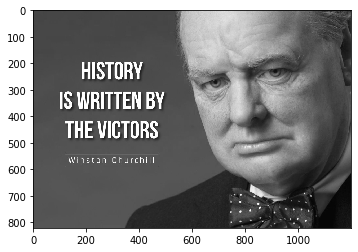

In [4]:
img = cv2.imread("history.jpg",flags=0)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_h,img_w,_ = img.shape
plt.imshow(img)

## PreProcessing the Image

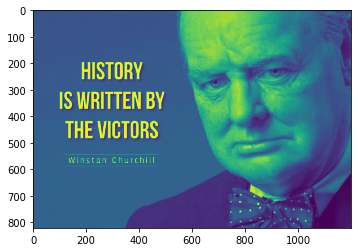

In [5]:
gray = cv2.threshold(img, 0, 255,cv2.THRESH_TOZERO)[1]
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # CONVERTING IMAGE TO GRAY SCALE
imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADDING GAUSSIAN BLUR
plt.imshow(imgBlur)

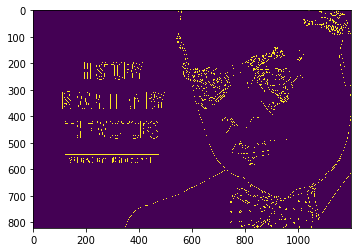

In [6]:
imgThreshold = cv2.Canny(imgBlur,100,0)# APPLYING CANNY BLUR
backup = imgThreshold.copy()
plt.imshow(imgThreshold)

In [7]:
kernel = np.ones((5, 5))
imgDial = cv2.dilate(imgThreshold, kernel, iterations=2) # APPLYING DILATION
imgThreshold = cv2.erode(imgDial, kernel, iterations=1)  # APPLYING EROSION

In [8]:
## FIND ALL COUNTOURS
imgContours = img.copy() # COPYING IMAGE FOR DISPLAY PURPOSES
imgBigContour = img.copy() # COPYING IMAGE FOR DISPLAY PURPOSES
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # FINDING ALL CONTOURS
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAWING ALL DETECTED CONTOURS

array([[[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [56, 56, 56],
        [53, 53, 53],
        [51, 51, 51]],

       [[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [58, 58, 58],
        [52, 52, 52],
        [49, 49, 49]],

       [[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [58, 58, 58],
        [53, 53, 53],
        [49, 49, 49]],

       ...,

       [[86, 86, 86],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [24, 24, 24]],

       [[86, 86, 86],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [24, 24, 24],
        [25, 25, 25],
        [26, 26, 26]],

       [[86, 86, 86],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [23, 23, 23],
        [26, 26, 26],
        [28, 28, 28]]], dtype=uint8)

## FINDING THE BIGGEST COUNTOUR

In [9]:
biggest, maxArea = utlis.biggestContour(contours)
if biggest.size != 0:
    biggest=utlis.reorder(biggest)
    cv2.drawContours(imgBigContour, biggest, -1, (0, 255, 0), 20) # DRAWING THE BIGGEST CONTOUR
    imgBigContour = utlis.drawRectangle(imgBigContour,biggest,2)
    pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
    pts2 = np.float32([[0, 0],[img_w, 0], [0, img_h],[img_w, img_h]]) # PREPARING POINTS FOR WARP
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imgWarpColored = cv2.warpPerspective(img, matrix, (img_w, img_h))

    #REMOVING 20 PIXELS FORM EACH SIDE
    
    imgWarpColored=imgWarpColored[20:imgWarpColored.shape[0] - 20, 20:imgWarpColored.shape[1] - 20]
    imgWarpColored = cv2.resize(imgWarpColored,(img_w,img_h))

## OUTPUT

Text Version:
 HISTORY
IS WRITTEN BY
THE VICTORS

Winston Churchill

 

 

 


Image:


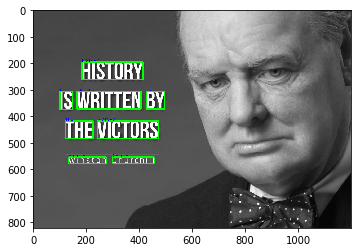

In [10]:
try:
    wordBoxes = pytesseract.image_to_data(imgWarpColored)
    for x,b in enumerate(wordBoxes.splitlines()):
        if x != 0:
            b = b.split()
            if len(b) == 12:
                    x,y,w,h,word = int(b[6]),int(b[7]),int(b[8]),int(b[9]),b[-1]
                    cv2.rectangle(imgWarpColored,(x,y),(w+x,h+y),(0,255,0),3)
                    cv2.putText(imgWarpColored,word,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),1)

    print("Text Version:\n",pytesseract.image_to_string(imgGray))
    print("\nImage:")
    plt.imshow(cv2.cvtColor(imgWarpColored,cv2.COLOR_RGB2BGR))
    plt.show()
except:
    wordBoxes = pytesseract.image_to_data(imgBlur)
    for x,b in enumerate(wordBoxes.splitlines()):
        if x != 0:
            b = b.split()
            if len(b) == 12:
                x,y,w,h,word = int(b[6]),int(b[7]),int(b[8]),int(b[9]),b[-1]
                cv2.rectangle(img,(x,y),(w+x,h+y),(0,255,0),3)
                cv2.putText(img,word,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),1)
    print("Text Version:\n",pytesseract.image_to_string(imgBlur))
    print("\nImage:")
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
    plt.show()